# Series de tiempo

## Datos: Precio del Bitcoin. Historico de 4 meses.

**Librerías**

In [1]:
library(tseries)
library(TSA)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'TSA' was built under R version 4.0.4"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




**Apertura y corrección de datos**

In [2]:
bc<-data.frame(read.table("BitcoinHD-4M.csv", sep=",", header = TRUE ))
bc_order <- apply(bc,2,rev)

In [3]:
transform(bc_order, Price = as.numeric(Price))

ï..Date,Price,Open,High,Low,Vol.,Change..
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
"Nov 17, 2020",17662.3,"16,715.80","17,845.40","16,562.00",175.87K,5.66%
"Nov 18, 2020",17774.6,"17,662.30","18,466.10","17,258.90",233.43K,0.64%
"Nov 19, 2020",17803.5,"17,775.10","18,166.00","17,380.10",135.94K,0.16%
"Nov 20, 2020",18675.2,"17,805.50","18,811.00","17,758.40",134.42K,4.90%
"Nov 21, 2020",18687.2,"18,673.80","18,966.00","18,397.50",108.91K,0.06%
"Nov 22, 2020",18412.9,"18,689.30","18,751.50","17,644.60",121.76K,-1.47%
"Nov 23, 2020",18379.6,"18,428.10","18,756.80","18,016.00",127.35K,-0.18%
"Nov 24, 2020",19152.6,"18,394.60","19,416.60","18,074.80",180.79K,4.21%
"Nov 25, 2020",18723.0,"19,151.50","19,486.70","18,527.70",146.12K,-2.24%


**Convertir a serie**

In [4]:
bc_l <- ts(as.numeric(bc_order[,2]), start =c(2020,322), end = c(2021,77), frequency=365)
head(bc_l, 12)

[1] 17662.3 17774.6 17803.5 18675.2 18687.2 18412.9 18379.6 19152.6 18723.0
[10] 17162.0 17127.1 17730.7

**Análisis descriptivo**

In [5]:
start(bc_l)
end(bc_l)
class(bc_l)
head(time(bc_l),12)
head(bc_l, 12)

[1] 2020  322

[1] 2021   77

[1] "ts"

[1] 2020.879 2020.882 2020.885 2020.888 2020.890 2020.893 2020.896 2020.899
 [9] 2020.901 2020.904 2020.907 2020.910

[1] 17662.3 17774.6 17803.5 18675.2 18687.2 18412.9 18379.6 19152.6 18723.0
[10] 17162.0 17127.1 17730.7

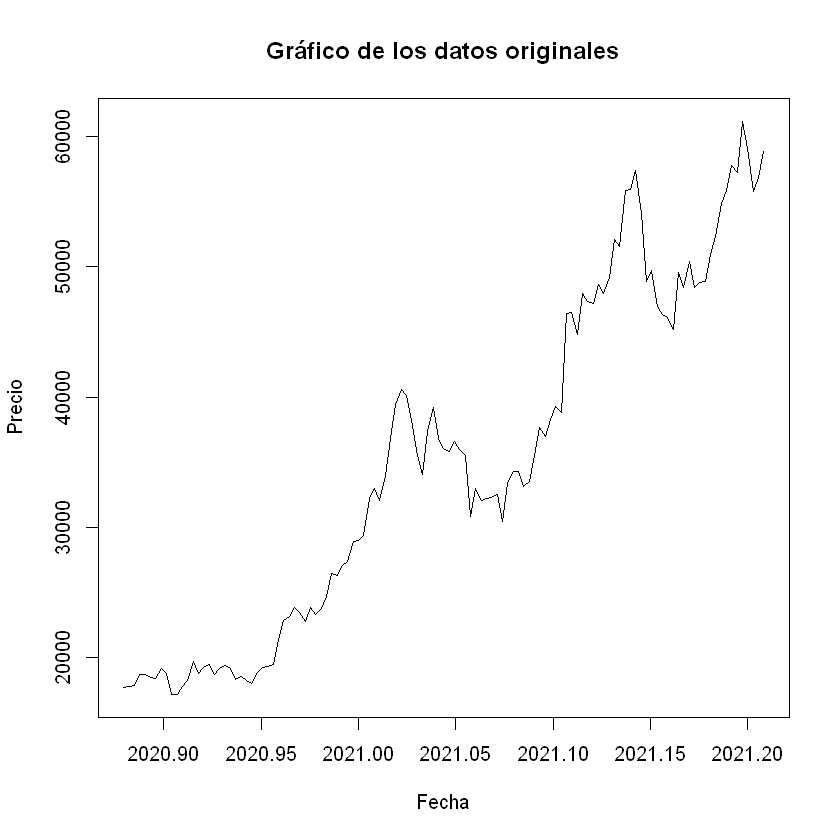

In [6]:
plot(bc_l,
    main = 'Gráfico de los datos originales',
    xlab = "Fecha",
    ylab = "Precio")

### Clasificación

**Tendencia lineal**

Modelo: y = $\beta_0 + \beta_1 x$

**$H_0:$** $\beta_1$ igual a 0.

**$H_a:$** $\beta_1$ diferente de 0.

$\alpha = 0.05$ 

In [7]:
tend<-lm(bc_l~time(bc_l), data=bc_l)

In [8]:
summary(tend)


Call:
lm(formula = bc_l ~ time(bc_l), data = bc_l)

Residuals:
   Min     1Q Median     3Q    Max 
 -8470  -3040     29   2748   9577 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -265034458    7377100  -35.93   <2e-16 ***
time(bc_l)      131155       3650   35.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3842 on 119 degrees of freedom
Multiple R-squared:  0.9156,	Adjusted R-squared:  0.9149 
F-statistic:  1291 on 1 and 119 DF,  p-value: < 2.2e-16


* **p-valor:** 2.2e^-16
* **R^2 ajustada:** 0.9149 por lo que se ajusta al modelo lineal lo suficiente.
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables y existe tendencia lineal.

**Modelo de tendencia logarítmica**

Modelo:  y = $\beta_0 + \beta_1 \log(x)$

**$H_0:$** $\beta_1$ igual a 0.

**$H_a:$** $\beta_1$ diferente de 0.

$\alpha = 0.05$ 

In [9]:
logtime <-log(time(bc_l))
tlog<-lm(bc_l~logtime)
summary(tlog)


Call:
lm(formula = bc_l ~ logtime)

Residuals:
    Min      1Q  Median      3Q     Max 
-8470.2 -3039.7    29.5  2748.4  9576.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.018e+09  5.615e+07  -35.93   <2e-16 ***
logtime      2.651e+08  7.377e+06   35.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3842 on 119 degrees of freedom
Multiple R-squared:  0.9156,	Adjusted R-squared:  0.9149 
F-statistic:  1291 on 1 and 119 DF,  p-value: < 2.2e-16


* **p-valor:** 2.2^-16
* **R^2 ajustada:** 0.9149, por lo que se ajusta al modelo logarítico lo suficiente.
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables y existe tendencia logaritmica.

**Modelo de tendencia exponencial**

Modelo:  y = $\beta_0  e^{\beta_1  x}$

**$H_0:$** $\beta_1$ igual a 0.

**$H_a:$** $\beta_1$ diferente de 0.

$\alpha = 0.05$ 

In [10]:
logPrice <- log(bc_l)
te <- lm(logPrice~time(bc_l))
summary(te)


Call:
lm(formula = logPrice ~ time(bc_l))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19311 -0.08419 -0.02992  0.07151  0.31348 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8037.7455   212.0867  -37.90   <2e-16 ***
time(bc_l)      3.9822     0.1049   37.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1105 on 119 degrees of freedom
Multiple R-squared:  0.9237,	Adjusted R-squared:  0.923 
F-statistic:  1440 on 1 and 119 DF,  p-value: < 2.2e-16


* **p-valor:** 2.2e^-16,
* **R^2 ajustada:** 0.923, por lo que se ajusta al modelo de tendencia exponencial 
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables por el modelo de tendencia exponencial.

**Modelo de tendencia polinómica**

Modelo: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

**$H_0:$** $\beta_1, \beta_2, \beta_3$ igual a 0.

**$H_a:$** $\beta_1, \beta_2, \beta_3$ alguna diferente de 0.

$\alpha = 0.05$ 

In [11]:
tc<-as.numeric(time(bc_l))
tenc<-lm(bc_l~poly(tc, degree=2))
summary(tenc)


Call:
lm(formula = bc_l ~ poly(tc, degree = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-7592.3 -2927.6  -350.3  2272.5  9516.0 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            34921.3      341.5 102.264   <2e-16 ***
poly(tc, degree = 2)1 138058.6     3756.3  36.754   <2e-16 ***
poly(tc, degree = 2)2   9584.5     3756.3   2.552    0.012 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3756 on 118 degrees of freedom
Multiple R-squared:   0.92,	Adjusted R-squared:  0.9187 
F-statistic: 678.7 on 2 and 118 DF,  p-value: < 2.2e-16


* **p-valor:** 2.2e^-16,
* **R^2 ajustada:** 0.9188, por lo que se ajusta al modelo de tendencia polinómica de buena manera.
* **Conclusión:** Se rechazo Ho, dado que el p-valor es muy pequeño y menor que alfa. Por lo que si hay relación entre las variables por el modelo de tendencia polinómica de grado 2.

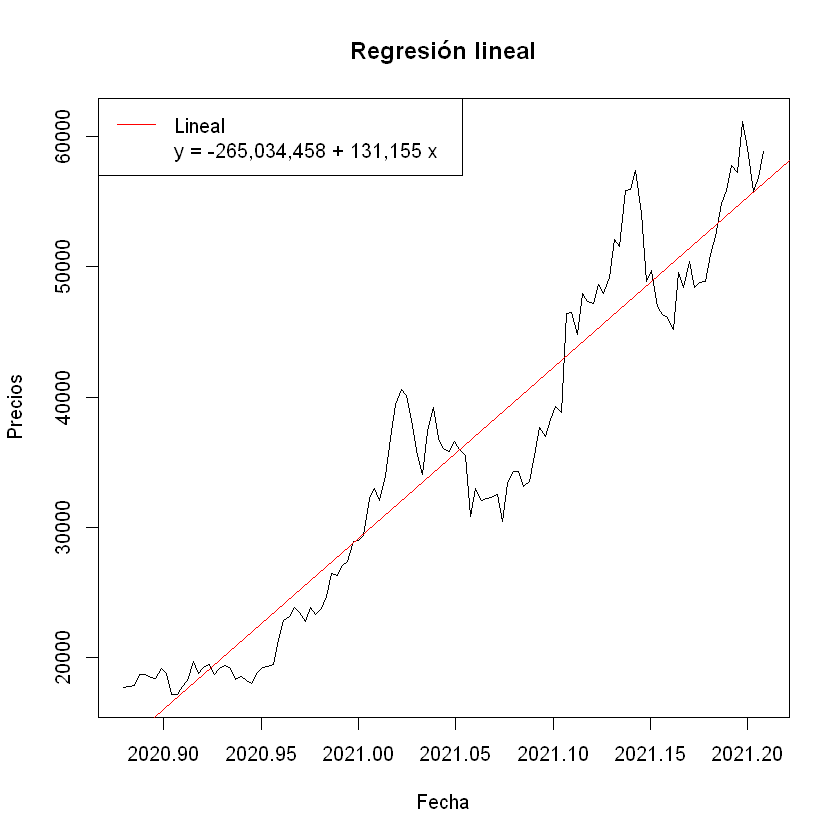

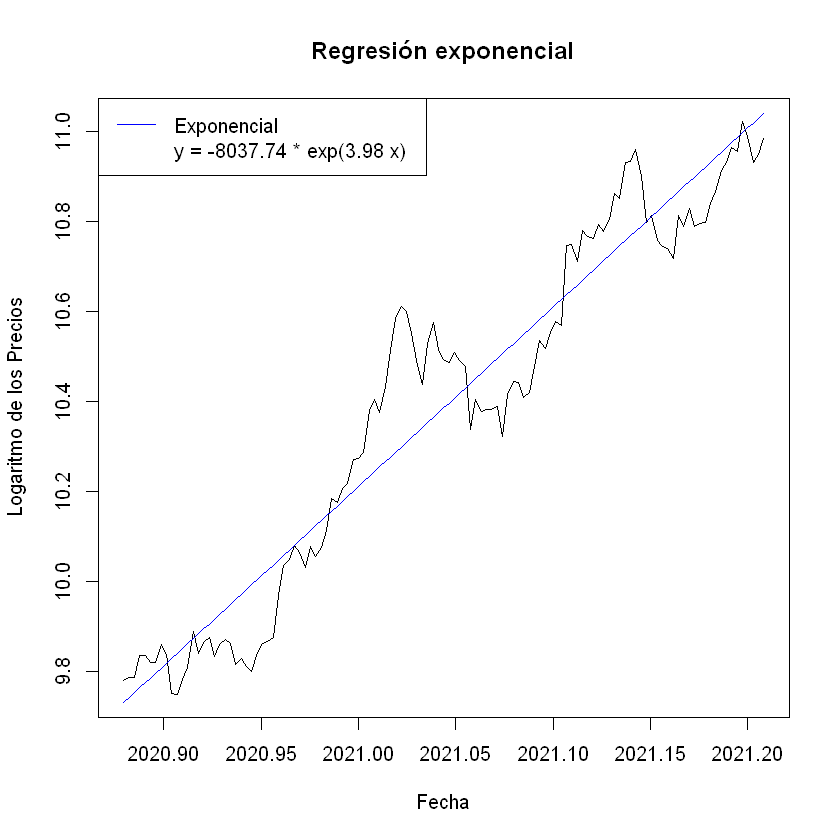

In [12]:
plot(bc_l,
    main = 'Regresión lineal',
    ylab = 'Precios',
    xlab = 'Fecha')
abline(tend, col="red")
legend('topleft', 
       legend = c('Lineal', 'y = -265,034,458 + 131,155 x'),
        col = c('red', 'white'),
      lty = 1)

plot(log(bc_l),
     main = 'Regresión exponencial',
    ylab = 'Logaritmo de los Precios',
    xlab = 'Fecha')
lines(tc, fitted.values(te),
     col = 'blue')
legend('topleft', 
       legend = c('Exponencial', 'y = -8037.74 * exp(3.98 x)'),
        col = c('blue', 'white'),
      lty = 1)

**Conclusión de media:** El modelo de tendencia exponenciaal y lineal se ajustan de buena manera por lo que la serie **No es estacionaria en media**

**Varianza**

**$H_0:$** La serie NO es estacionaria en varianza

**$H_a:$** La serie SI es estacionaria en varianza

$\alpha = 0.05$ 

In [13]:
adf.test(bc_l, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  bc_l
Dickey-Fuller = -2.7205, Lag order = 4, p-value = 0.2773
alternative hypothesis: stationary


**Conclusión de varianza:** La serie **No es estacionaria varianza**

### Conclusión general de serie original: 
**No es estacionaria en media ni varianza**

## Correcciones

**Corrección 1**

In [14]:
c1 <- diff(log(bc_l))

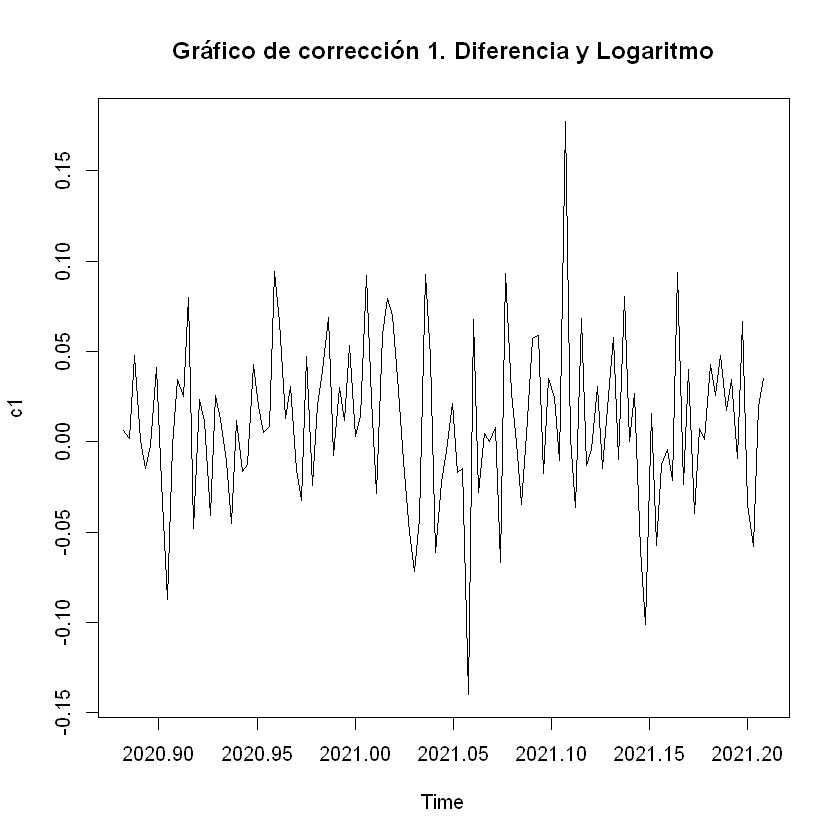

In [15]:
plot(c1,
    main = 'Gráfico de corrección 1. Diferencia y Logaritmo')

**Tendencia**

**Tendencia lineal**

Modelo: y = $\beta_0 + \beta_1 x$

**$H_0:$** $\beta_1$ igual a 0.

**$H_a:$** $\beta_1$ diferente de 0.

$\alpha = 0.05$ 

In [16]:
tn<-lm(c1~time(c1))
summary(tn)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.150008 -0.025184 -0.002056  0.025010  0.167457 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.367192  88.764728   0.027    0.979
time(c1)    -0.001166   0.043920  -0.027    0.979

Residual standard error: 0.04566 on 118 degrees of freedom
Multiple R-squared:  5.976e-06,	Adjusted R-squared:  -0.008469 
F-statistic: 0.0007052 on 1 and 118 DF,  p-value: 0.9789


**Modelo de tendencia polinómica**

Modelo: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

**$H_0:$** $\beta_1, \beta_2, \beta_3$ igual a 0.

**$H_a:$** $\beta_1, \beta_2, \beta_3$ alguna diferente de 0.

$\alpha = 0.05$ 

In [17]:
tc<-as.numeric(time(c1))
summary(lm(c1~poly(tc, degree=3)))


Call:
lm(formula = c1 ~ poly(tc, degree = 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15137 -0.02636 -0.00081  0.02517  0.16940 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)            0.010039   0.004192   2.395   0.0182 *
poly(tc, degree = 3)1 -0.001213   0.045917  -0.026   0.9790  
poly(tc, degree = 3)2 -0.021885   0.045917  -0.477   0.6345  
poly(tc, degree = 3)3  0.031060   0.045917   0.676   0.5001  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04592 on 116 degrees of freedom
Multiple R-squared:  0.005874,	Adjusted R-squared:  -0.01984 
F-statistic: 0.2285 on 3 and 116 DF,  p-value: 0.8764


**Conclusión de media:** Los modelos de tendencia no se ajustan. **Es estacionaria en media**

**Varianza**

In [18]:
adf.test(c1, alternative="stationary")

Warning message in adf.test(c1, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -4.5556, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


**Conclusión de varianza:** La serie de la corrección 1 **Es estacionaria varianza**

### Conclusión general de correción 1 de la serie: 
**Es estacionaria en media y en varianza**

## Modelado

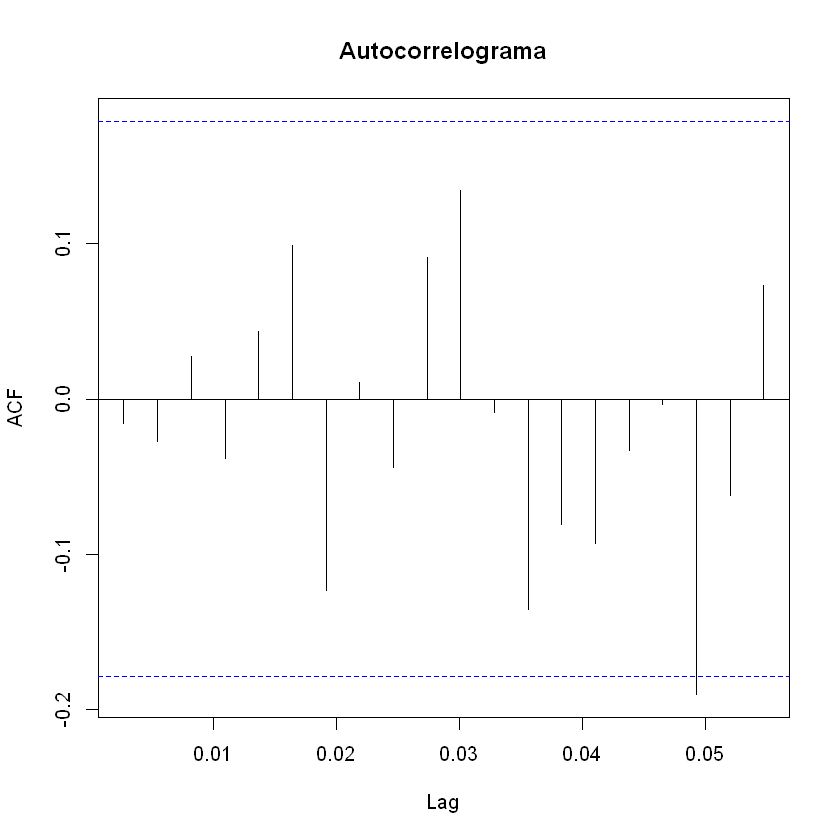

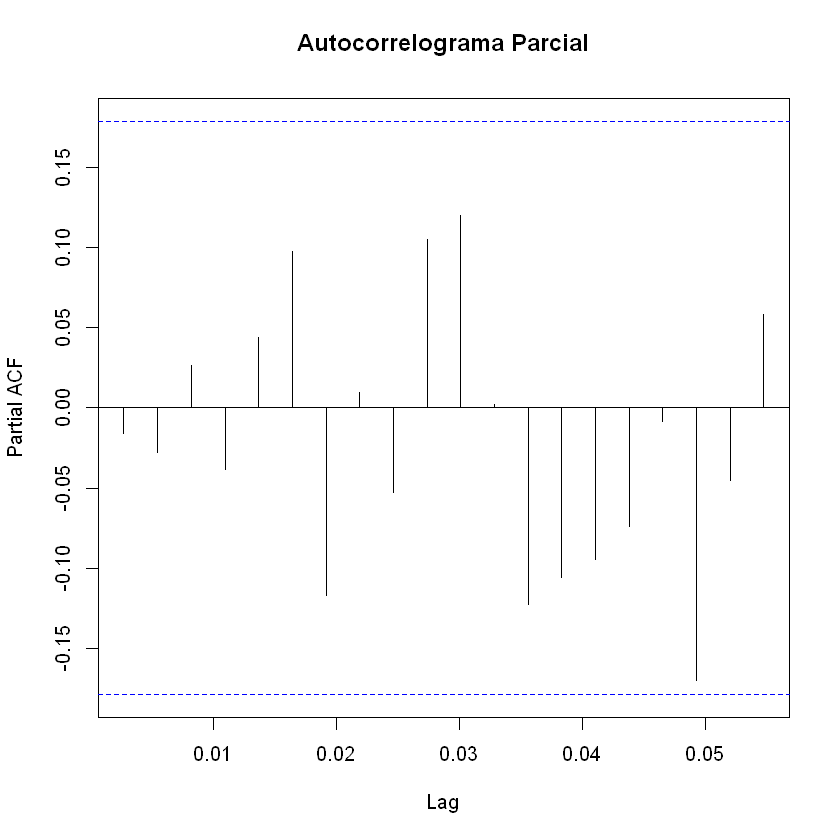

In [19]:
acf(c1,
   main = 'Autocorrelograma') 
pacf(c1,
    main = 'Autocorrelograma Parcial') 

**MODELO AR(𝑝)**

In [20]:
ar(c1)


Call:
ar(x = c1)


Order selected 0  sigma^2 estimated as  0.002067

In [21]:
AIC(arima(c1, order=c(1,0,0), method="ML"))

[1] -396.267

* El orden del mejor AR: 1

* AIC del mejor AR: -398.2670

**MODELO MA(𝑞)**

In [22]:
aic0<-Inf # le das un numero muy grande
for (i in 1:20)
{
  aic1<-AIC(arima(c1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
MA.mejor
aic0 

[1] 1

[1] -396.2687

* El orden del mejor MA: 1
* AIC del mejor MA: -396.2687

In [23]:
defaultW <- getOption("warn") 

options(warn = -1) 

**MODELO ARMA(p,q)**

In [24]:
arma.aic<-Inf
for(j in 1:10)
{
  for (i in 1:10)
  {
    aux<-AIC(arima(c1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
ARMA.mejor
arma.aic

[1] 2 2

[1] -394.4476

In [25]:
options(warn = defaultW)

* El orden del mejor MA: 1
* AIC del mejor ARMA: -394.44

### Mejor modelo:
**MA(1)**

## Ruido blanco

In [26]:
res<-residuals(arima(c1, order=c(2,0,4), method = 'ML'))

**Media**

In [27]:
mean(res)

[1] 1.79746e-05

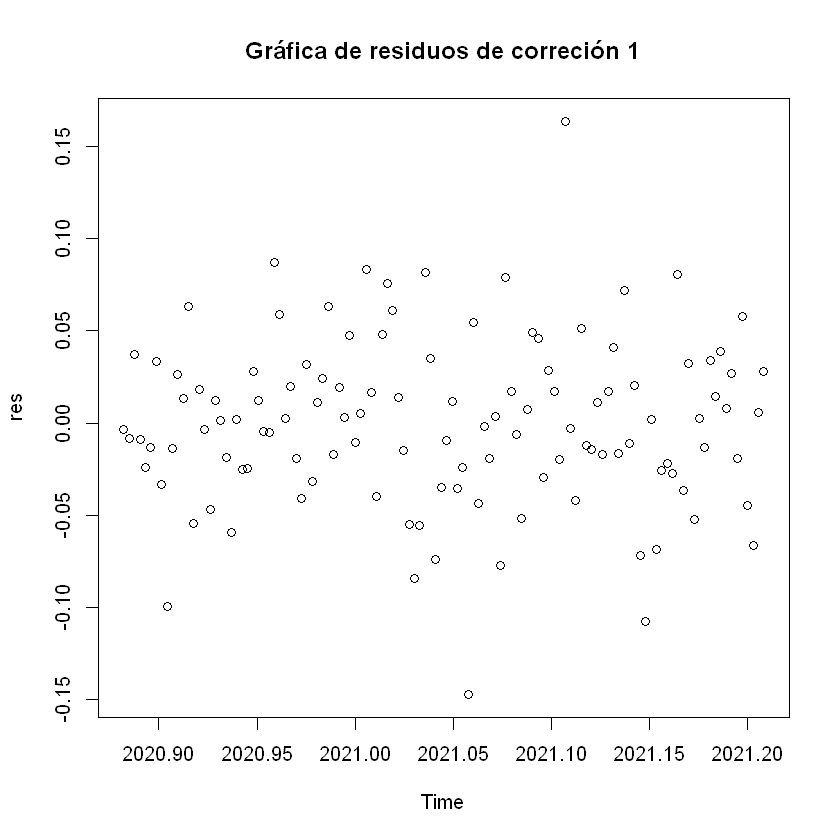

In [28]:
plot(res,
     main = 'Gráfica de residuos de correción 1',
     type="p")

La media es aproximadamente 0.

La varianza en el gráfico se ve lo suficientemente dispersa

**Incorrelación**

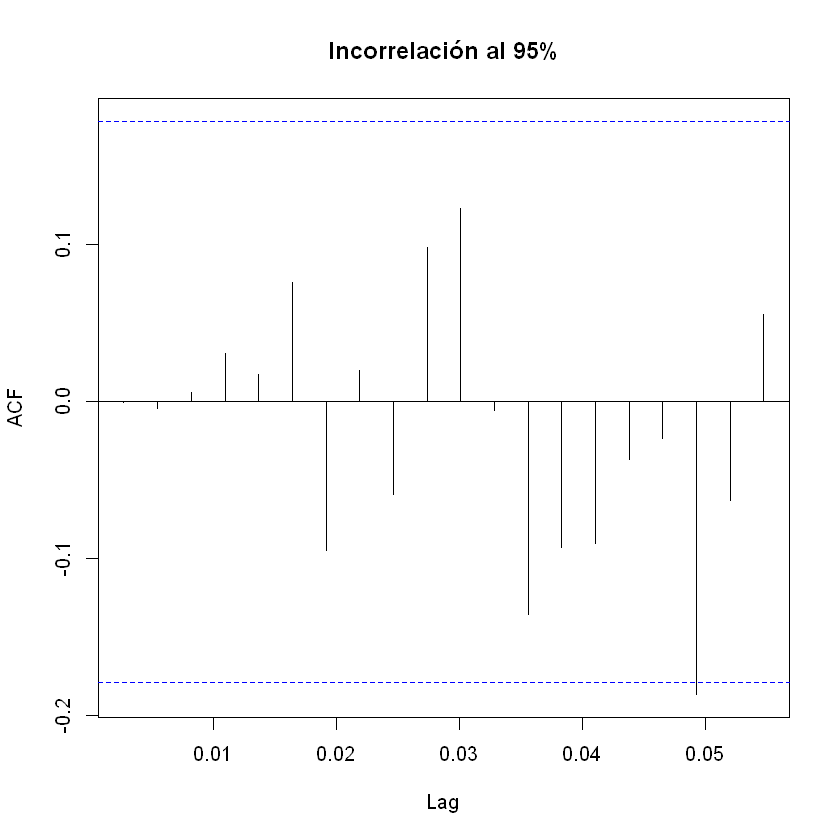

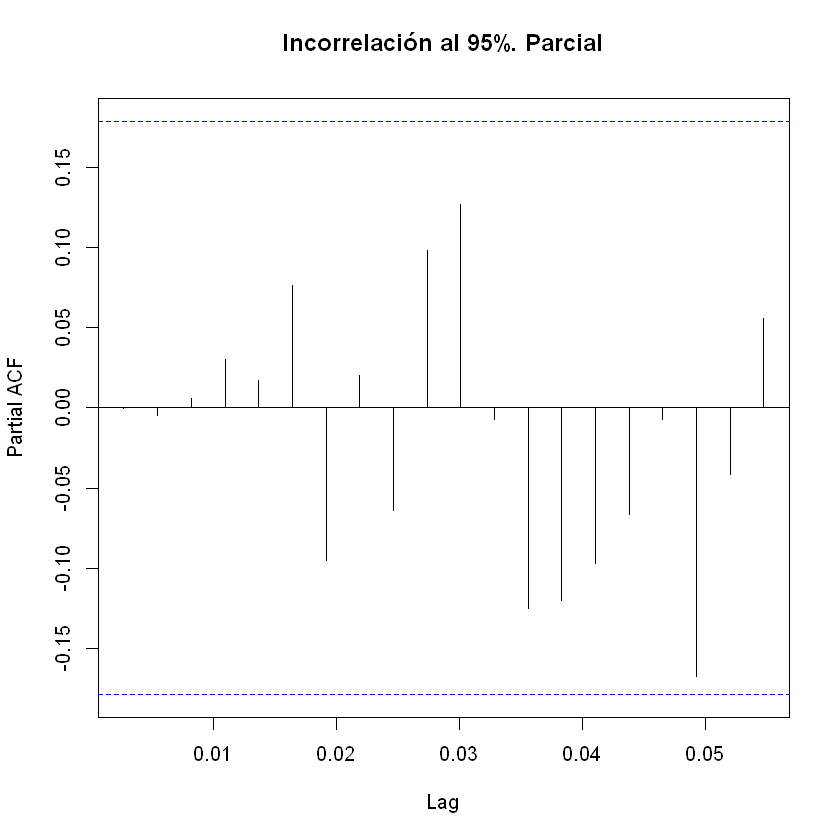

In [29]:
acf(res,
   main = 'Incorrelación al 95%') 
pacf(res,
     ci = .95,
    main = 'Incorrelación al 95%. Parcial') 

**Incorrelación de forma analítica**

**$H_0:$** Son independientes

**$H_a:$** Muestran alguna dependencia

$\alpha = 0.05$

In [30]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 3.2355e-05, df = 1, p-value = 0.9955


La incorrelación de forma analítica apunta a independencia en los residuos.

**Normalidad**

**$H_0:$** Siguen una distribución normal

**$H_a:$** No sigue una distribución normal

$\alpha = 0.05$

In [31]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.98616, p-value = 0.2604


Existe normalidad en los residuos

**Conclusión de Ruido Blanco:** Según las pruebas realizadas, se demuestra que los residuales cumplen con un comportamiento de ruido blanco.

## Predicciones

In [32]:
Pred <- predict(arima(bc_l, order=c(0, 1,1), method="ML"), n.ahead=20)$pred
head(Pred)

[1] 58929.09 58929.09 58929.09 58929.09 58929.09 58929.09

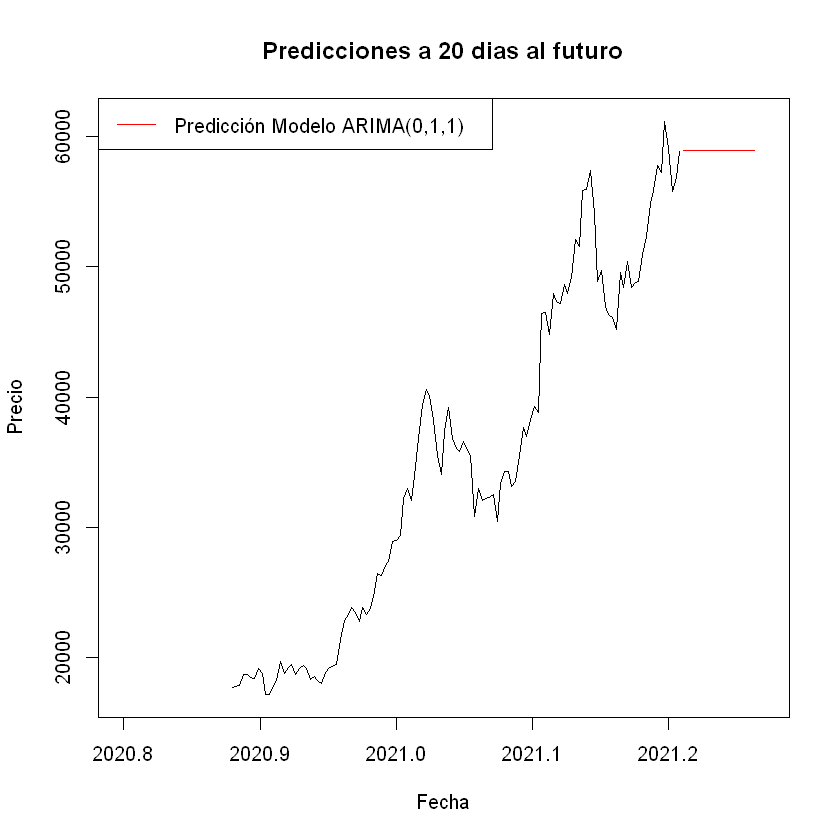

In [33]:
plot(bc_l,
    main = 'Predicciones a 20 dias al futuro',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2020.8, 2021.27))
lines(Pred, 
      col="red")
legend('topleft', 
       legend = c('Predicción Modelo ARIMA(0,1,1)'),
        col = c('red'),
      lty = 1)

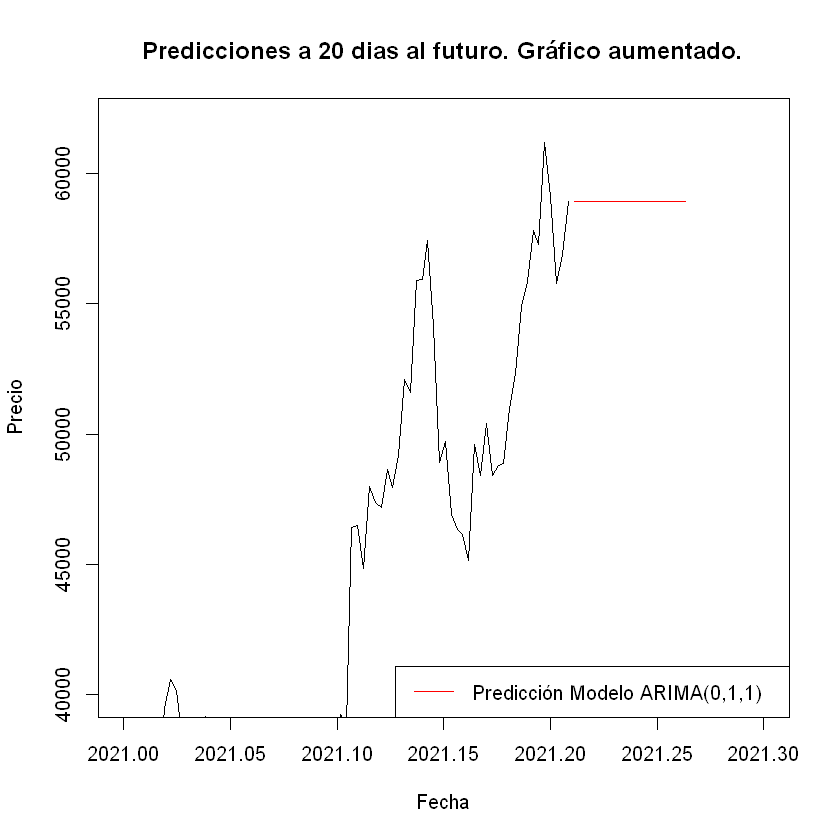

In [34]:
plot(bc_l,
    main = 'Predicciones a 20 dias al futuro. Gráfico aumentado.',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2021, 2021.3),
    ylim = c(40000,62000))
lines(Pred, 
      col="red")
legend('bottomright', 
       legend = c('Predicción Modelo ARIMA(0,1,1)'),
        col = c('red'),
      lty = 1)